# Submitted by: Mohd Akbar

# GRIP- The Spark Foundation

### Data Science and Business Analytics Internship

##### Task- Predict the score of student based on the number of study hours 

### Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

### Importing Data

In [3]:
Data=pd.read_csv("C:\\Users\\AKBAR\\Desktop\\student_scores - student_scores.csv")

### Exploring Data

##### Get First & Last N Rows

In [4]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


##### Summary of Data

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### Statistical Summary of Data

In [7]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Dimensions of the Data

In [9]:
Data.shape #rows-25 and coloumns-2

(25, 2)

##### Correlation between Variables

In [12]:
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualization of the Data

Text(0.5, 0, 'Study Hours')

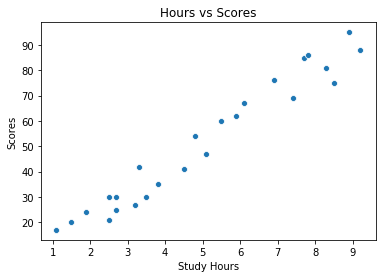

In [14]:
sbn.scatterplot(data=Data,x="Hours",y="Scores")
plt.title("Hours vs Scores")
plt.xlabel("Study Hours")

###### From the above graph we can conclude there is a positive linear relationship between variables(Hours & Scores) 

##### Splitting the Data into training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
x=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

##### Dimensions of x_train, x_test, y_train and y_test

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


##### Training of the Data

In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Visualizing the Training Set Data

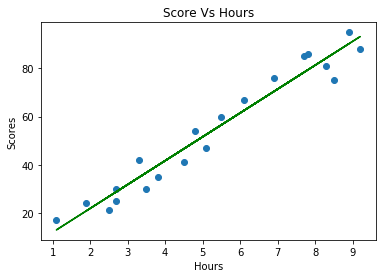

In [36]:
Regression_line=regressor.coef_*x_train+regressor.intercept_
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title("Score Vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


##### Visualizing the Test Set Data

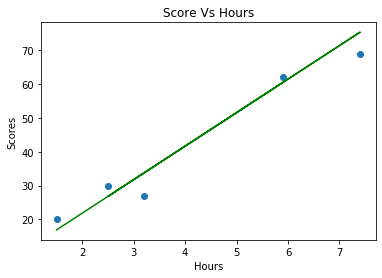

In [37]:
Regression_line=regressor.coef_*x_test+regressor.intercept_
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),color="green")
plt.title("Score Vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Predictions using our Model

In [48]:
Y_Pred=regressor.predict(x_test)
Y_Pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [39]:
print(regressor.predict([[9.25]]))

[93.69173249]


### Evaluating the model

In [49]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Y_Pred)) 

Mean Absolute Error: 4.183859899002982
